In [1]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 9.0 MB/s eta 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

In [3]:
transformer = GramianAngularField()

In [4]:
import requests
import bs4

In [5]:
r = requests.get('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130429&end=20200428')
soup = bs4.BeautifulSoup(r.text,"lxml")

In [6]:
dateList = []
openList = []
highList = []
lowList = []
closeList = []
volumeList = []
capList = []

In [7]:
tr = soup.find_all('tr',{'class':'cmc-table-row'})

In [8]:
for item in tr:
    dateList.append(item.find_all('td')[0].text) 
    openList.append(item.find_all('td')[1].text) 
    highList.append(item.find_all('td')[2].text) 
    lowList.append(item.find_all('td')[3].text) 
    closeList.append(item.find_all('td')[4].text) 
    volumeList.append(item.find_all('td')[5].text) 
    capList.append(item.find_all('td')[6].text)

zeroIndex = volumeList.index('0')

dateList = dateList[:zeroIndex] 
dateList = dateList[::-1]

openList = openList[:zeroIndex]
openList = openList[::-1]
openList = [float(i.replace(',','')) for i in openList] 

highList = highList[:zeroIndex]
highList = highList[::-1]
highList = [float(i.replace(',','')) for i in highList] 

lowList = lowList[:zeroIndex]
lowList = lowList[::-1]
lowList = [float(i.replace(',','')) for i in lowList] 

closeList = closeList[:zeroIndex]
closeList = closeList[::-1]
closeList = [float(i.replace(',','')) for i in closeList] 

volumeList = volumeList[:zeroIndex]
volumeList = volumeList[::-1]
volumeList = [float(i.replace(',','')) for i in volumeList] 
volumeListB = volumeList

capList = capList[:zeroIndex]
capList = capList[::-1]
capList = [float(i.replace(',','')) for i in capList] 
capListB = capList

dateList = np.array(dateList).reshape((len(dateList),1))
openList = np.array(openList).reshape((len(dateList),1))
highList = np.array(highList).reshape((len(dateList),1))
lowList = np.array(lowList).reshape((len(dateList),1))
closeList = np.array(closeList).reshape((len(dateList),1))
volumeList = np.array(volumeList).reshape((len(dateList),1))
capList = np.array(capList).reshape((len(dateList),1))

In [9]:
sevenDaysLow = np.zeros((len(lowList),1))
last7days = []
i=0
for item in lowList:
    
    if len(last7days)<7:
        last7days.append(item[0])
    else:
        last7days.append(item[0])
        last7days.pop(0)
    
    sevenDaysLow[i]=min(last7days)
    i=i+1
    
sevenDaysHigh = np.zeros((len(highList),1))
last7days = []
i=0
for item in highList:
    
    if len(last7days)<7:
        last7days.append(item[0])
    else:
        last7days.append(item[0])
        last7days.pop(0)
    
    sevenDaysHigh[i]=max(last7days)
    i=i+1  
#%%
monthlyLow = np.zeros((len(lowList),1))
last30days = []
i=0
for item in lowList:
    
    if len(last30days)<30:
        last30days.append(item[0])
    else:
        last30days.append(item[0])
        last30days.pop(0)
    
    monthlyLow[i]=min(last30days)
    i=i+1
    

monthlyHigh = np.zeros((len(highList),1))
last30days = []
i=0
for item in highList:
    
    if len(last30days)<30:
        last30days.append(item[0])
    else:
        last30days.append(item[0])
        last30days.pop(0)
    
    monthlyHigh[i]=max(last30days)
    i=i+1 
#%%
#yearlyLow = np.zeros((len(lowList),1))
#last365days = []
#i=0
#for item in lowList:
#    
#    if len(last365days)<365:
#        last365days.append(item[0])
#    else:
#        last365days.append(item[0])
#        last365days.pop(0)
#    
#    yearlyLow[i]=min(last365days)
#    i=i+1
    
#yearlyHigh = np.zeros((len(lowList),1))
#last365days = []
#i=0
#for item in highList:
#    
#    if len(last365days)<365:
#        last365days.append(item[0])
#    else:
#        last365days.append(item[0])
#        last365days.pop(0)
#    
#    yearlyHigh[i]=max(last365days)
#    i=i+1

from statistics import mean 

sevenDaysAvg = np.zeros((len(lowList),1))
last7days = []
i=0
for item in openList:
    
    if len(last7days)<7:
        last7days.append(item[0])
    else:
        last7days.append(item[0])
        last7days.pop(0)
    
    sevenDaysAvg[i]=mean(last7days)
    i=i+1
    

monthlyAvg = np.zeros((len(lowList),1))
last30days = []
i=0
for item in openList:
    
    if len(last30days)<30:
        last30days.append(item[0])
    else:
        last30days.append(item[0])
        last30days.pop(0)
    
    monthlyAvg[i]=mean(last30days)
    i=i+1
    

yearlyAvg = np.zeros((len(lowList),1))
last365days = []
i=0
for item in openList:
    
    if len(last365days)<365:
        last365days.append(item[0])
    else:
        last365days.append(item[0])
        last365days.pop(0)
    
    yearlyAvg[i]=mean(last365days)
    i=i+1
    

sevenDaysVolAvg = np.zeros((len(lowList),1))
last7days = []
i=0
for item in volumeList:
    
    if len(last7days)<7:
        last7days.append(item[0])
    else:
        last7days.append(item[0])
        last7days.pop(0)
    
    sevenDaysVolAvg[i]=mean(last7days)
    i=i+1
    
    
monthlyVolAvg = np.zeros((len(lowList),1))
last30days = []
i=0
for item in volumeList:
    
    if len(last30days)<30:
        last30days.append(item[0])
    else:
        last30days.append(item[0])
        last30days.pop(0)
    
    monthlyVolAvg[i]=mean(last30days)
    i=i+1
   
yearlyVolAvg = np.zeros((len(lowList),1))
last365days = []
i=0
for item in volumeList:
    
    if len(last365days)<365:
        last365days.append(item[0])
    else:
        last365days.append(item[0])
        last365days.pop(0)
    
    yearlyVolAvg[i]=mean(last365days)
    i=i+1

In [10]:
Y = (closeList-openList)/sevenDaysAvg

co = (closeList-openList)/sevenDaysAvg #Günün kapanışı-açılışı/haftanın ortalama fiyatı

cl = (closeList-lowList)/openList

hc = (highList-closeList)/openList

hl = (highList-lowList)/openList

VolChange = np.diff(volumeListB).reshape((len(volumeListB)-1,1)) / volumeList[:-1] 
VolChange = np.insert(VolChange,0,0).reshape((len(VolChange)+1,1)) #İlk günün düne göre değişimini 0 kabul edelim, böylece boyut kaybetmeyiz.
 
CapChange = np.diff(capListB).reshape((len(capListB)-1,1)) / capList[:-1]
CapChange = np.insert(CapChange,0,0).reshape((len(CapChange)+1,1)) #İlk günün düne göre değişimini 0 kabul edelim, böylece boyut kaybetmeyiz.

min7 = (closeList-sevenDaysLow)/sevenDaysAvg
max7 = (closeList-sevenDaysHigh)/sevenDaysAvg
avg7 = (closeList-sevenDaysAvg)/sevenDaysAvg

min30 = (closeList-monthlyLow)/sevenDaysAvg
max30 = (closeList-monthlyHigh)/sevenDaysAvg
avg30 = (closeList-monthlyAvg)/sevenDaysAvg

#min365 = (closeList-yearlyLow)/openList
#max365 = (closeList-yearlyHigh)/openList
#avg365 = (closeList-yearlyAvg)/openList

vol7avg = (volumeList-sevenDaysVolAvg)/sevenDaysVolAvg
vol30avg = (volumeList-monthlyVolAvg)/monthlyVolAvg
#vol365avg = (volumeList-yearlyVolAvg)/volumeList

avg7vs30 = (sevenDaysAvg - monthlyAvg)/yearlyAvg
avg7vs30Vol = (sevenDaysVolAvg - monthlyVolAvg)/yearlyVolAvg

In [11]:
m = len(Y)

dailyFeatureNum = 16
totalFeatureNum = 16

dataVal = np.zeros((m, totalFeatureNum))
#7 gün boyunca günlük alınacak veri.
dataVal[:,0] = list(co)
dataVal[:,1] = list(cl)
dataVal[:,2] = list(hc)
dataVal[:,3] = list(hl)
dataVal[:,4] = list(VolChange)
dataVal[:,5] = list(CapChange)
dataVal[:,6] = list(min7)
dataVal[:,7] = list(max7)
dataVal[:,8] = list(avg7)
dataVal[:,9] = list(min30)
dataVal[:,10] = list(max30)
dataVal[:,11] = list(avg30)
dataVal[:,12] = list(vol7avg)
dataVal[:,13] = list(vol30avg)
dataVal[:,14] = list(avg7vs30)
dataVal[:,15] = list(avg7vs30Vol)

#7 günlük periyot için alınacak tek veri, genelde son günü baz alır.
#dataVal[:,2] = list(avg7)
#dataVal[:,3] = list(max7)
#dataVal[:,4] = list(min7)
#dataVal[:,5] = list(vol7avg)
#dataVal[:,6] = list(avg7vs30)
#dataVal[:,7] = list(avg7vs30Vol)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(dataVal)
dataVal = scaler.transform(dataVal)
#%% Dataset'i initialize edelim:
k = 7 # 7 veriye bakarak 8.'yi tahmin etmek istiyoruz.
dataX = np.zeros((k*dailyFeatureNum+0,m-k)) #+4 rakamı aşağıda ekstra append edilen feature sayısı!
dataY = np.zeros((m-k,1))

In [13]:
dataX.shape

(112, 2309)

In [14]:
dataY.shape

(2309, 1)

In [15]:
#%% dataSet elde edelim.
for i in range(m-k-1):
    x = dataVal[i:k+i,0:dailyFeatureNum].flatten() # 7 gün'lük veriler alındı günlük 6 veriden 6x7=42 veri.
    #Bu 42 günlük verinin yanına 7 gün için haftalık ve aylık veriler de eklensin.
    # x = np.append(x,[ min7[k+i-1,0], max7[k+i-1,0], avg7[k+i-1,0], min30[k+i-1,0], max30[k+i-1,0], avg30[k+i-1,0], vol7avg[k+i-1,0], vol30avg[k+i-1,0]])
    #x = np.append(x,[ min7[k+i-1,0], max7[k+i-1,0], avg7[k+i-1,0],vol7avg[k+i-1,0]])
    #x = np.append(x,[ dataVal[k+i-1,1],dataVal[k+i-1,2],dataVal[k+i-1,3],dataVal[k+i-1,4],dataVal[k+i-1,5],dataVal[k+i-1,6],dataVal[k+i-1,7] ])
    
    if closeList[k+i+1,0]-openList[k+i+1,0]>0:
        y = 1
    else:
        y = 0
        
    dataX[:,i] = x
    dataY[i] = y

In [16]:
dataX = dataX.T 
dataX.shape

(2309, 112)

In [17]:
transformer = GramianAngularField()

In [18]:
X_new = transformer.transform(dataX)
X_new.shape

(2309, 112, 112)

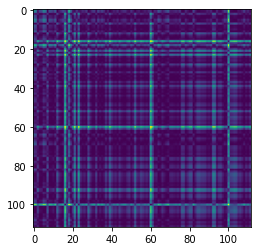

In [19]:
plt.imshow(X_new[15])

In [ ]:
#İlk 2000 veriyi training yapalım kalan 309'u validation yapalım.
#Positiveleri pos ismiyle negative'leri neg ismiyle kaydedelim:
for i in range(2000):
    if dataY[i]>0.5:
        plt.imsave('../output/hey/pos{}.jpg'.format(i), X_new[i])
    else:
        plt.imsave('../output/hey/neg{}.jpg'.format(i), X_new[i])

In [20]:
#current directory'de (kaggle/working) yeni bir directory oluşturalım:
import os
os.makedirs('training')

In [ ]:
#current directory set
cd /../kaggle/working

In [21]:
#see what's inside
!ls

__notebook_source__.ipynb  training


In [42]:
cd /../kaggle/working/training

/kaggle/working/training


In [44]:
plt.imsave('deneme2.jpg', X_new[0])

In [ ]:
!ls

In [45]:
cd /../kaggle/working

/kaggle/working


In [47]:
from IPython.display import FileLink
FileLink(r'training')

ValueError: Cannot display a directory using FileLink. Use FileLinks to display 'training'.

In [48]:
from zipfile import ZipFile

In [51]:
cd /../kaggle/working/training

/kaggle/working/training


In [52]:
# create a ZipFile object
zipObj = ZipFile('sample.zip', 'w')

# Add multiple files to the zip
zipObj.write('deneme.jpg')
zipObj.write('deneme1.jpg')
zipObj.write('deneme2.jpg')
 
# close the Zip File
zipObj.close()